In [ ]:

from google.colab import files

files.upload()

Saving Databasedfuzzy_final.xlsx to Databasedfuzzy_final.xlsx


{'Databasedfuzzy_final.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
!pip install pandas openpyxl

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:

# m alternatives
m = 11

# t periods
t = 6

# n criteria
n = 17
crit_max = [1] * n

# Equal weights

w = [1/n]*n


In [ ]:
dados = pd.read_excel('Databasedfuzzy_final.xlsx')

display(dados)

,Companies,Report year,SDG1,Unnamed: 3,Unnamed: 4,SDG2,Unnamed: 6,Unnamed: 7,SDG3,Unnamed: 9,...,Unnamed: 43,SDG15,Unnamed: 45,Unnamed: 46,SDG16,Unnamed: 48,Unnamed: 49,SDG17,Unnamed: 51,Unnamed: 52
0,Volkswagen,2018,0,0.0,0.0,0,0.0,0.00,0.25,0.50,...,0.0,0,0.00,0.25,0,0,0.00,0.25,0.50,0.75
1,Volkswagen,2019,0,0.0,0.0,0,0.0,0.00,0.00,0.25,...,0.0,0,0.00,0.25,0,0,0.25,0.25,0.50,0.75
2,Volkswagen,2020,0,0.0,0.0,0,0.0,0.00,0.25,0.50,...,0.0,0,0.00,0.25,0,0,0.25,0.50,0.75,1.00
3,Volkswagen,2021,0,0.0,0.0,0,0.0,0.00,0.25,0.50,...,0.0,0,0.00,0.00,0,0,0.25,0.50,0.75,1.00
4,Volkswagen,2022,0,0.0,0.0,0,0.0,0.00,0.00,0.25,...,0.0,0,0.00,0.00,0,0,0.00,0.50,0.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Denso,2019,0,0.0,0.0,0,0.0,0.25,0.00,0.00,...,0.0,0,0.00,0.25,0,0,0.25,0.25,0.50,0.75
62,Denso,2020,0,0.0,0.0,0,0.0,0.25,0.00,0.00,...,0.0,0,0.25,0.50,0,0,0.00,0.25,0.50,0.75
63,Denso,2021,0,0.0,0.0,0,0.0,0.25,0.00,0.25,...,0.0,0,0.25,0.50,0,0,0.00,0.25,0.50,0.75
64,Denso,2022,0,0.0,0.0,0,0.0,0.25,0.00,0.25,...,0.0,0,0.00,0.25,0,0,0.00,0.50,0.75,1.00


In [ ]:
Companies = dados['Companies'].to_numpy()

# Obter índices dos elementos únicos na ordem em que aparecem pela primeira vez
empresas_unicas, indices = np.unique(Companies, return_index=True)

# A ordem original pode ser recuperada usando os índices
empresas_unicas_na_ordem_original = Companies[sorted(indices)]

alt = empresas_unicas_na_ordem_original
print(alt)

['Volkswagen' 'Toyota Motor' 'Daimler (Mercedes)' 'Ford Motor'
 'General Motors' 'Honda Motor' 'BMW' 'Nissan Motor' 'Hyundai Motor'
 'Kia Motors' 'Denso']


In [ ]:
numpy_array = dados.values

print(numpy_array)

[['Volkswagen' 2018 0 ... 0.25 0.5 0.75]
 ['Volkswagen' 2019 0 ... 0.25 0.5 0.75]
 ['Volkswagen' 2020 0 ... 0.5 0.75 1.0]
 ...
 ['Denso' 2021 0 ... 0.25 0.5 0.75]
 ['Denso' 2022 0 ... 0.5 0.75 1.0]
 ['Denso' 2023 0 ... 0.5 0.75 1.0]]


In [ ]:

years = np.unique(numpy_array[:, 1])  # Coluna 'Report year' está na posição 1 do array

matrizes_por_ano = {}

for year in years:
    linhas_ano_atual = numpy_array[numpy_array[:, 1] == year]

    matrizes_por_ano[year] = linhas_ano_atual


matriz_2018 = matrizes_por_ano[2018]



In [ ]:
matriz_decisao_todos_anos = []
for chave, valor in matrizes_por_ano.items():
  matriz_decisao_todos_anos.append(valor[:, 2:])


In [ ]:
matriz_decisao_todos_anos_separado_fuzzy = []
for ano in matriz_decisao_todos_anos:
  temp = []
  for empresa in ano:
    temp.append(empresa.reshape(-1, 3))
  matriz_decisao_todos_anos_separado_fuzzy.append(temp)

matriz_decisao_todos_anos_separado_fuzzy = np.array(matriz_decisao_todos_anos_separado_fuzzy)

print(matriz_decisao_todos_anos_separado_fuzzy.shape)


(6, 11, 17, 3)


# Fuzzy PROMETHEE II

In [ ]:
class Fuzzy_Promethee():


    def __init__(self):
        pass


    def step5(self, criterio, vetor_criteriomax):

      if vetor_criteriomax:

        vetor_comparacao_par_a_par = []
        for a in itertools.product(criterio, criterio):

          array1 = a[0]
          array2 = a[1]

          all_equal = False
          all_greater_or_equal = False
          all_less_or_equal = False

          all_equal = np.all(array1 == array2)


          if not all_equal:
            all_greater_or_equal = np.all(array1 >= array2)

            all_less_or_equal = np.all(array1 <= array2)



          if all_greater_or_equal:
            l1, m1, u1 = array1
            l2, m2, u2 = array2

            v = np.array([l1 - u2, m1 - m2, u1 - l2])

            vetor_comparacao_par_a_par.append(v)


          elif all_equal or all_less_or_equal:
            v = np.zeros(len(array1))
            vetor_comparacao_par_a_par.append(v)


          else:
            print("Algo errado com os vetores")
            break

      vetor_comparacao_par_a_par = np.array(vetor_comparacao_par_a_par)

      num_linhas, num_colunas = criterio.shape



      matriz_de_comparacao = vetor_comparacao_par_a_par.reshape(num_linhas, num_linhas, 3)

      return matriz_de_comparacao



    def run(self, matriz, vetor_criteriomax, vetor_pesos, alt):

        matriz_zeros = np.zeros((m, m, 3))

        matriz_M = np.array(matriz_zeros)

        for c in range(matriz.shape[1]):

            criterio = matriz[:, c]


            matriz_de_comp = self.step5(criterio, vetor_criteriomax)


            pi_ab = (matriz_de_comp * vetor_pesos[c])



            matriz_M += pi_ab






        fi_mais = np.sum(matriz_M, axis=1)

        fi_menos =  np.sum(matriz_M, axis=0)



        media_fi_mais = np.mean(fi_mais, axis=1, keepdims=True)
        media_fi_menos = np.mean(fi_menos, axis=1, keepdims=True)



        fi_mais_flat = media_fi_mais.flatten()
        fi_menos_flat = media_fi_menos.flatten()



        fi = fi_mais_flat - fi_menos_flat


        index = [i for i in range(0, len(fi))]
        fi_ordenado = sorted(zip(fi, alt, index), key=lambda x: x[0], reverse=True)
        return fi, fi_ordenado

In [ ]:
pontuacao_promethee = []
for idx, matriz_fuzzy_por_ano in enumerate(matriz_decisao_todos_anos_separado_fuzzy):
  promethee_objeto = Fuzzy_Promethee()
  pontuacao_promethee_por_ano, promethee_resultado = promethee_objeto.run(matriz_fuzzy_por_ano, crit_max, w, alt)
  pontuacao_promethee.append(pontuacao_promethee_por_ano)




pontuacao = pontuacao_promethee
print("pontuacao")
print(pontuacao_promethee)

pontuacao
[array([-0.15196078,  0.71078431,  1.30392157,  2.2745098 ,  1.03431373,
       -0.6372549 , -0.4754902 , -0.04411765, -1.12254902, -0.96078431,
       -1.93137255]), array([-0.6127451 ,  0.73529412,  1.9754902 ,  1.49019608,  0.78921569,
       -1.09803922, -0.72058824,  0.78921569, -0.88235294, -0.93627451,
       -1.52941176]), array([-0.3627451 , -0.20098039,  2.17156863,  1.30882353,  0.76960784,
       -0.95588235, -0.63235294,  1.03921569, -0.63235294, -0.84803922,
       -1.65686275]), array([-0.57843137, -0.14705882,  2.2254902 ,  1.57843137,  0.12254902,
       -0.74019608, -0.63235294,  0.87745098, -0.47058824, -0.79411765,
       -1.44117647]), array([-0.31372549,  0.3872549 ,  2.49019608,  1.84313725, -0.4754902 ,
       -1.12254902, -0.74509804,  0.3872549 , -0.36764706, -0.58333333,
       -1.5       ]), array([ 0.28921569,  0.82843137,  2.39215686,  0.66666667, -1.00490196,
       -1.05882353, -0.51960784,  1.20588235, -0.84313725, -0.46568627,
       -1.49019

In [ ]:


df = pd.DataFrame(pontuacao_promethee)

nome_arquivo_excel = 'resultados.xlsx'

df.to_excel(nome_arquivo_excel, index=False)

print(f'Os resultados foram salvos em {nome_arquivo_excel} com sucesso!')

Os resultados foram salvos em resultados.xlsx com sucesso!


[-0.15196078 -0.6127451  -0.3627451  -0.57843137 -0.31372549  0.28921569]
[2018 2019 2020 2021 2022 2023]
[ 0.71078431  0.73529412 -0.20098039 -0.14705882  0.3872549   0.82843137]
[2018 2019 2020 2021 2022 2023]
[1.30392157 1.9754902  2.17156863 2.2254902  2.49019608 2.39215686]
[2018 2019 2020 2021 2022 2023]
[2.2745098  1.49019608 1.30882353 1.57843137 1.84313725 0.66666667]
[2018 2019 2020 2021 2022 2023]
[ 1.03431373  0.78921569  0.76960784  0.12254902 -0.4754902  -1.00490196]
[2018 2019 2020 2021 2022 2023]
[-0.6372549  -1.09803922 -0.95588235 -0.74019608 -1.12254902 -1.05882353]
[2018 2019 2020 2021 2022 2023]
[-0.4754902  -0.72058824 -0.63235294 -0.63235294 -0.74509804 -0.51960784]
[2018 2019 2020 2021 2022 2023]
[-0.04411765  0.78921569  1.03921569  0.87745098  0.3872549   1.20588235]
[2018 2019 2020 2021 2022 2023]
[-1.12254902 -0.88235294 -0.63235294 -0.47058824 -0.36764706 -0.84313725]
[2018 2019 2020 2021 2022 2023]
[-0.96078431 -0.93627451 -0.84803922 -0.79411765 -0.583333

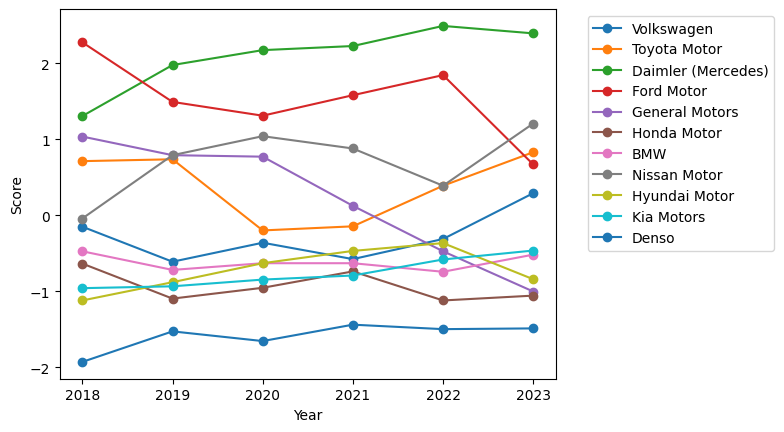

In [ ]:
anos = np.array([2018, 2019, 2020, 2021, 2022, 2023])

pontuacao = np.array(pontuacao).T

for i in range(len(pontuacao)):
  print( pontuacao[i])
  print(anos)
  plt.plot(anos, pontuacao[i], label=empresas_unicas_na_ordem_original[i], marker='o')

plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
plt.savefig('pontuacao_empresas.png', bbox_inches='tight')

plt.savefig('pontuacao_empresas.pdf', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

# PROMETHEE II

In [ ]:
import numpy as np
import itertools



class Promethee():


    def __init__(self):
        pass


    def funcao_pref_por_tipo(self, criterio, vetor_criteriomax, q, p, function_type):

        if function_type == 1:
            if vetor_criteriomax:

                v = [a[0] > (a[1] + q) and 1 or q for a in itertools.product(criterio, criterio)]
            else:
                v = [a[0] < (a[1] + q) and 1 or q for a in itertools.product(criterio, criterio)]

            args = [iter(v)] * len(criterio)
            matriz_de_comp = (list(itertools.zip_longest(*args)))


        if function_type == 2:
            mat_comp = ([(a[0] - a[1]) for a in itertools.product(criterio, criterio)])
            if vetor_criteriomax:
                v = [a[0] - (a[1]) for a in itertools.product(criterio, criterio)]
                args = [iter(v)] * len(criterio)
                matriz_de_comp_temp = (list(itertools.zip_longest(*args)))
            else:
                print('não programei ainda')
            matriz_de_comp = [[0 if d <= q else ((d - q) / (p - q)) if q < d <= p else 1 for d in row] for row in matriz_de_comp_temp]




        return np.asarray(matriz_de_comp)




    def run(self, matriz, vetor_criteriomax, funçao_de_pref, vetor_pesos, alt):


        matriz_M = np.zeros((len(matriz), len(matriz)))
        for c in range(matriz.shape[1]):

            criterio = matriz[:, c]
            func_type = funçao_de_pref[c][0]
            q = funçao_de_pref[c][1]
            p = funçao_de_pref[c][2]

            matriz_de_comp = self.funcao_pref_por_tipo(criterio, vetor_criteriomax[c], q, p, func_type)


            matriz_de_comp = matriz_de_comp * vetor_pesos[c]
            matriz_M += matriz_de_comp

        fi_mais = np.array([sum(a) / (len(a) - 1) for a in matriz_M])
        fi_menos = np.array([sum(a) / (len(a) - 1) for a in matriz_M.transpose()])

        fi = fi_mais - fi_menos

        index = [i for i in range(0, len(fi))]
        fi_ordenado = sorted(zip(fi, alt, index), key=lambda x: x[0], reverse=True)
        return fi, fi_ordenado


q = 0
p = 0
funçao_de_pref = [(2, q, p)] * n


In [ ]:
numInterationSmaa = 10000
quantidade_criterios = len(anos)

# START THE SMAA METHOD:

# Create a matrix of zeros with the number of rows and columns equal to the number of alternatives (Countries). This matrix represents the probability of each alternative being in each position.
prob_matrix = np.zeros((len(pontuacao), len(pontuacao)))

# SMAA:

for i in range(numInterationSmaa):

    w = np.random.dirichlet(np.ones(quantidade_criterios))

    promethee_objeto = Promethee()
    score, promethee_resultado = promethee_objeto.run(pontuacao, crit_max, funçao_de_pref, w, alt)

    ranking = np.argsort(-score)

    for index, position in enumerate(ranking):

        prob_matrix[index][position] += 1



prob_matrix = np.array(prob_matrix).T
percent_alt_positions = np.array(prob_matrix / numInterationSmaa * 100)
np.set_printoptions(suppress=True)

df = pd.DataFrame(percent_alt_positions,  index=empresas_unicas_na_ordem_original)
df.columns = [f"{i}th" if i not in [1, 2, 3] else f"{i}st" if i == 1 else f"{i}nd" if i == 2 else f"{i}rd" for i in range(1, 12)]


display(df)




,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
Volkswagen,0.00,0.00,0.00,0.00,21.43,78.11,0.46,0.00,0.00,0.00,0.0
Toyota Motor,0.00,0.00,8.24,67.67,24.09,0.00,0.00,0.00,0.00,0.00,0.0
Daimler (Mercedes),98.41,1.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
Ford Motor,1.59,95.07,3.16,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.0
General Motors,0.00,0.00,6.36,19.68,52.53,20.07,0.72,0.43,0.21,0.00,0.0
Honda Motor,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,5.11,93.90,0.0
BMW,0.00,0.00,0.00,0.00,0.00,0.00,40.14,55.04,4.82,0.00,0.0
Nissan Motor,0.00,3.34,82.24,12.47,1.95,0.00,0.00,0.00,0.00,0.00,0.0
Hyundai Motor,0.00,0.00,0.00,0.00,0.00,0.96,57.45,31.60,8.80,1.19,0.0
Kia Motors,0.00,0.00,0.00,0.00,0.00,0.86,1.23,11.94,81.06,4.91,0.0


from matplotlib import pyplot as plt
_df_0['1st'].plot(kind='hist', bins=20, title='1st')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['2nd'].plot(kind='hist', bins=20, title='2nd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['3rd'].plot(kind='hist', bins=20, title='3rd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['4th'].plot(kind='hist', bins=20, title='4th')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='1st', y='2nd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='2nd', y='3rd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='3rd', y='4th', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='4th', y='5th', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['11th']
  ys = series['1st']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('11th', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('11th')
_ = plt.ylabel('1st')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['11th']
  ys = series['2nd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('11th', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('11th')
_ = plt.ylabel('2nd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['11th']
  ys = series['3rd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('11th', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('11th')
_ = plt.ylabel('3rd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['11th']
  ys = series['4th']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('11th', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('11th')
_ = plt.ylabel('4th')

from matplotlib import pyplot as plt
_df_12['1st'].plot(kind='line', figsize=(8, 4), title='1st')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['2nd'].plot(kind='line', figsize=(8, 4), title='2nd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['3rd'].plot(kind='line', figsize=(8, 4), title='3rd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['4th'].plot(kind='line', figsize=(8, 4), title='4th')
plt.gca().spines[['top', 'right']].set_visible(False)